<a href="https://colab.research.google.com/github/LeZuy/MachineLearningBasic/blob/main/Softmax_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [164]:
from keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
#type(x_train)

In [165]:
import matplotlib.pyplot as plt
import numpy as np

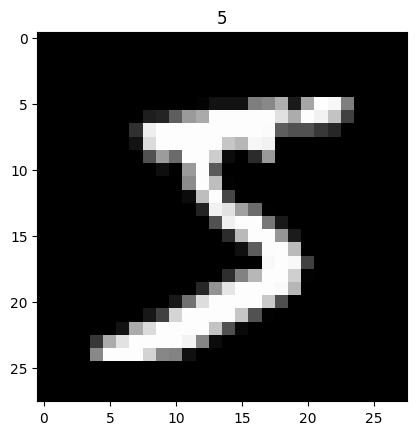

In [166]:
plt.imshow(X_train[0], cmap='gray')
plt.title(Y_train[0]);

In [167]:
def softmax(X):
  X_exp = np.exp(X)
  partition = np.sum(X_exp, axis = 1, keepdims = True)
  return X_exp / partition

def predict(x, w):
  a = softmax((x.dot(w)))
  return np.argmax(a, axis = 1)

In [168]:
def cross_entropy(y_hat, y):
  epsilon = 1e-6
  loss = -np.mean(np.sum(np.log(y_hat+epsilon) * y, axis = 1))
  return loss

def GradientStep(y_hat, y, x, theta, lr, m):
  cost = y_hat - y
  gradient = 1/m * np.dot(x.T,cost)
  theta = theta - lr*gradient
  return theta


In [175]:
num_in=28*28
num_out=10

w = np.random.normal(0, 0.01, (num_in, num_out))
b = np.zeros(num_out)

lr=0.5
batch=10000
epochs=5001
train_log = np.zeros(epochs+1)

In [176]:
x_train = X_train.reshape(60000, num_in)
x_test = X_test.reshape(10000, num_in)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [177]:
#convert label vector y to one-hot
y_1hot = np.zeros((Y_train.size, max(Y_train)+1))
rows = np.arange(Y_train.size)
y_1hot[rows, Y_train] = 1

In [178]:
for epoch in range(epochs):
  sigma = softmax(np.dot(x_train[:batch], w))
  if epoch % 50 == 0:
    loss = cross_entropy(sigma, y_1hot[:batch])
    print(epoch, ":", loss)
    train_log[epoch] = loss
  w = GradientStep(sigma, y_1hot[:batch], x_train[:batch], w, lr, batch)

0 : 2.3266919573924563
50 : 0.4376643588116425
100 : 0.36812884701336857
150 : 0.33705319339607803
200 : 0.31791679719270705
250 : 0.30435284156006803
300 : 0.29394932649779887
350 : 0.28555846267129487
400 : 0.2785516307075809
450 : 0.27254989039382066
500 : 0.2673083384518437
550 : 0.2626601282853039
600 : 0.2584868102812602
650 : 0.25470147021841283
700 : 0.25123858542001026
750 : 0.24804763257197168
800 : 0.24508890108893833
850 : 0.24233066029791686
900 : 0.23974718874067863
950 : 0.23731737010057233
1000 : 0.2350236718780997
1050 : 0.2328513888617329
1100 : 0.23078807367739668
1150 : 0.2288231019858313
1200 : 0.22694733620487723
1250 : 0.2251528623981927
1300 : 0.22343278222688806
1350 : 0.22178104684282327
1400 : 0.22019232308231568
1450 : 0.21866188478733625
1500 : 0.2171855238566614
1550 : 0.21575947692281056
1600 : 0.2143803645038665
1650 : 0.21304514018945991
1700 : 0.2117510479545536
1750 : 0.21049558610042432
1800 : 0.20927647663300186
1850 : 0.20809163912863488
1900 : 0.2

In [179]:
y = predict(x_test, w)
accuracy = np.mean(y == Y_test)
print(accuracy)

0.9072


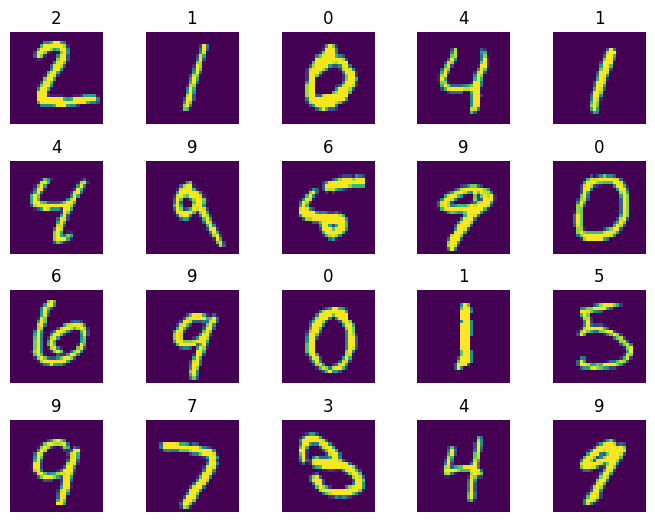

In [180]:
fig = plt.figure()

for i in range(1, 21):
  fig.add_subplot(4, 5, i)
  plt.imshow(X_test[i])
  plt.title(y[i])
  plt.axis('off')


fig.subplots_adjust(left=0,
                    bottom=0,
                    right=1.0,
                    top=1.0,
                    wspace=0.4,
                    hspace=0.4)
fig.show()